In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.getcwd()
os.chdir('/content/drive/MyDrive/Omdena-Srilanka/Data/rest_1')

In [4]:
!pip install nilearn --quiet
import nilearn
import os
import nibabel as nib
from nilearn import image

## Reading the whole volume of  4D file




In [5]:
rest_fMRI_image = r"rest.nii.gz"
Shape = image.load_img(rest_fMRI_image).shape
TimeFrame =  image.load_img(rest_fMRI_image).shape[-1]
print(Shape)
print(TimeFrame)
dir_name = 'Components'
if not os.path.exists(dir_name):
    os.mkdir(dir_name)

(64, 64, 50, 120)
120


It is a 4D nifti file. We load it into the memory to print its
shape.



All components are then a 3D image. We can then loop over the individual component



## Looping on all volumes in a 4D file

If we want to plot all the volumes in this 4D file, we can use iter_img
to loop on them.



In [6]:
for img,i in zip(image.iter_img(rest_fMRI_image),range(1,TimeFrame+1)):
    f = 'rest_%02d.nii.gz' % i
    # img is now an in-memory 3D img
    nib.save(img,os.path.join('Components',f))
   

In [7]:
print(os.getcwd())

/content/drive/MyDrive/Omdena-Srilanka/Data/rest_1


In [8]:
import scipy.ndimage as nd
for j in range(1,12):
   img = nib.load("./Components/rest_%02d.nii.gz" % j)
   img_np = img.get_fdata()

   for i in range(1,img_np.shape[-1]+1):
     img_npr = nd.rotate(img_np,90, axes=(0, 1))
    # img is now an in-memory 3D img
     print(img_npr.shape)

   ni_img = nib.Nifti1Image(img_npr, img.affine)
   nib.save(ni_img, 'rest_%02d_rotate.nii.gz' % j)


(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)
(64, 64, 50)

In [10]:
img = nib.load("rest_01_rotate.nii.gz")
print(img.shape)

(64, 64, 50)


In [11]:
import scipy.ndimage as nd
img_np = img.get_fdata()
os.mkdir('Rotation')


In [12]:
img_npr = nd.rotate(img_np,90)
    # img is now an in-memory 3D img
    
print(img.shape)
type(img_npr)




(64, 64, 50)


numpy.ndarray

Orthographic projections over the x-axis

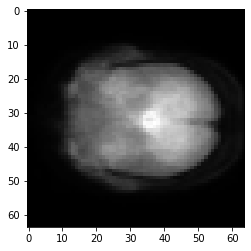

In [15]:
import numpy as np
import matplotlib.pyplot as plt

vr = np.zeros((img_np.shape[0],img_np.shape[1]))
for z in range(img_np.shape[2]):
    vr+=img_np[:,:,z]
#z = vr[:,:,81]  
plt.imshow(nd.rotate(vr,90),cmap="gray")  

Maximum-intensity projections

(64, 64)


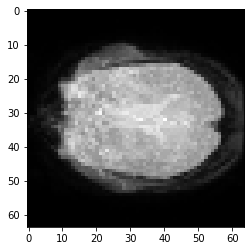

In [16]:
mip = np.zeros((img_np.shape[0],img_np.shape[1]))
for z in range(img_np.shape[2]):
    mip = np.maximum(mip,img_np[:,:,z])
print(mip.shape)
plt.imshow(nd.rotate(mip,90),cmap="gray")  
    